In [1]:
%matplotlib ipympl
def figure(name, nrows=1, ncols=1, *args, **kwargs):
    plt.close(name)
    return plt.subplots(nrows, ncols, num=name, *args, **kwargs)

import numpy as np
import pylab as plt
plt.style.use('default')

In [2]:
from ipywidgets import FloatSlider, HBox, IntSlider
na = np.newaxis
from scipy.fftpack import fft, fftfreq, fftshift, ifft, ifftshift

# Aufgabe 3

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
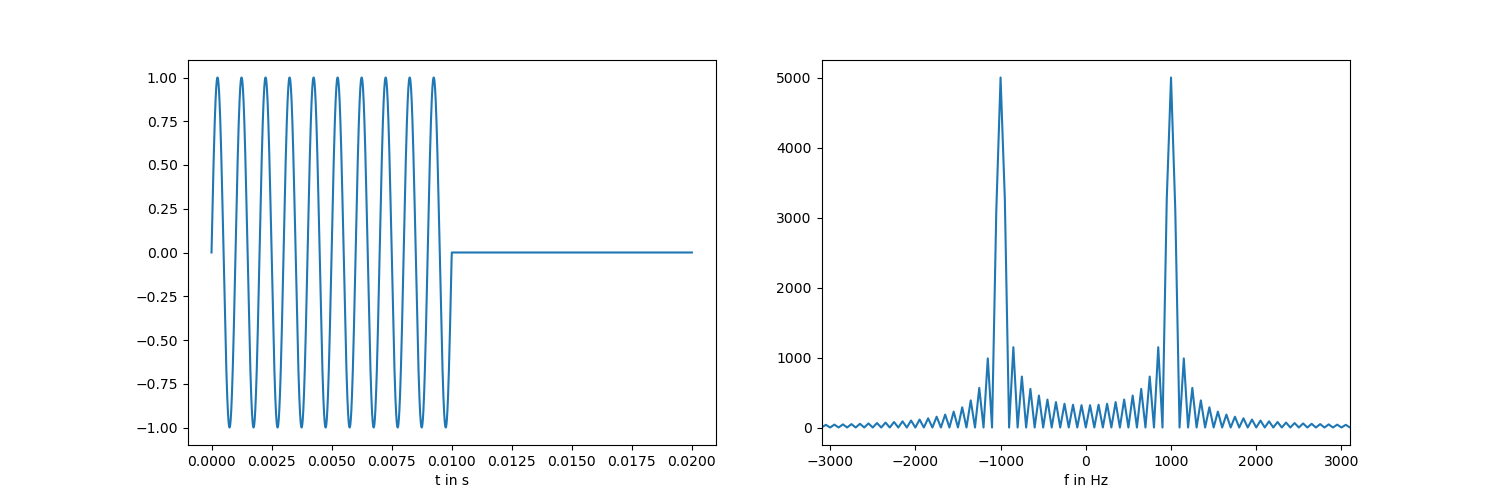

In [3]:
def get_slider():
    Nc = IntSlider(orientation='horizontal', description='Nc: ', value=10, min=1, max=100)
    Np = IntSlider(orientation='horizontal', description='Np: ', value=2, min=1, max=10)
    
    f = 1e3
    N = 10000
    t = np.linspace(0, (Nc.value / f)*Np.value, N, endpoint=False)
    u = np.sin(2*np.pi*f*t)
    # u = np.ones(N)
    u[N//Np.value:] = 0 
    u_wp = fftshift(abs(fft(u)))*Np.value
    w_p = fftshift(fftfreq(N, d=t[1]-t[0]))
    
    fig, ax = figure('wave', 1, 2, figsize=(15, 5))
    lines = [ax[0].plot(t, u)[0],
             ax[1].plot(w_p, u_wp)[0]]
    ax[0].set_xlabel('t in s')
    ax[1].set_xlabel('f in Hz')

    ax[1].set_xlim([-3.1*f, 3.1*f])
    
    
    def redraw(change):
        t = np.linspace(0, (Nc.value / f)*Np.value, N, endpoint=False)
        u = np.sin(2*np.pi*f*t)
        # u = np.ones(N)
        u[N//Np.value:] = 0 
        u_wp = fftshift(abs(fft(u)))*Np.value
        w_p = fftshift(fftfreq(N, d=t[1]-t[0]))
        
        lines[0].set_data(t, u)
        lines[1].set_data(w_p, u_wp)
                        
        for i in range(1):
            ax[i].relim()
            ax[i].autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()


    Nc.observe(redraw, names='value')
    Np.observe(redraw, names='value')
    return HBox([Nc, Np])


get_slider()

In [71]:
x = np.linspace(-15, 15, 500)
np.searchsorted(x, 5.2)

336